In [1]:
from Data import prepare_data
from VFL import make_binary_models, train
train_loader, test_loader, input_dim_list = prepare_data(
    'PCMAC', num_clients=2)
models, top_model = make_binary_models(
    input_dim_list, type="FNN")
no_fs_history = train(models, top_model, train_loader, test_loader)

Trying to load the datasets from PCMAC
(1943, 3289) (1943,)
Client 0: Feature Index 0-1096
Client 1: Feature Index 1097-2192
Server : Feature Index 2193-3288
Epoch: 1, Train Loss: 11.6555, Train Acc: 0.2114, Test Acc: 0.5189, Best Acc: 0.5189
Epoch: 2, Train Loss: 11.0627, Train Acc: 0.5220, Test Acc: 0.5090, Best Acc: 0.5189
Epoch: 3, Train Loss: 11.0723, Train Acc: 0.5215, Test Acc: 0.5315, Best Acc: 0.5315
Epoch: 4, Train Loss: 10.9927, Train Acc: 0.5786, Test Acc: 0.7750, Best Acc: 0.7750
Epoch: 5, Train Loss: 10.6680, Train Acc: 0.5334, Test Acc: 0.9615, Best Acc: 0.9615
Epoch: 6, Train Loss: 7.9905, Train Acc: 0.9177, Test Acc: 0.9752, Best Acc: 0.9752
Epoch: 7, Train Loss: 5.0031, Train Acc: 0.9570, Test Acc: 0.9820, Best Acc: 0.9820
Epoch: 8, Train Loss: 1.3309, Train Acc: 0.9785, Test Acc: 0.9935, Best Acc: 0.9935
Epoch: 9, Train Loss: 0.2418, Train Acc: 0.9951, Test Acc: 0.9980, Best Acc: 0.9980
Epoch: 10, Train Loss: 0.0747, Train Acc: 0.9980, Test Acc: 0.9995, Best Acc: 0.9

Epoch: 1, Train Loss: 13.8461, Train Acc: 0.4795, Test Acc: 0.4910, Best Acc: 0.491, Num Feats: 3289.0000
Epoch: 2, Train Loss: 12.1751, Train Acc: 0.4795, Test Acc: 0.4910, Best Acc: 0.491, Num Feats: 3289.0000
Epoch: 3, Train Loss: 12.2513, Train Acc: 0.4795, Test Acc: 0.4910, Best Acc: 0.491, Num Feats: 3289.0000
Epoch: 4, Train Loss: 12.2414, Train Acc: 0.4795, Test Acc: 0.4910, Best Acc: 0.491, Num Feats: 3289.0000
Epoch: 5, Train Loss: 12.2360, Train Acc: 0.4795, Test Acc: 0.4910, Best Acc: 0.491, Num Feats: 3289.0000
Epoch: 6, Train Loss: 12.1359, Train Acc: 0.4795, Test Acc: 0.4910, Best Acc: 0.491, Num Feats: 3289.0000
Epoch: 7, Train Loss: 11.8935, Train Acc: 0.4795, Test Acc: 0.4974, Best Acc: 0.4973626723223754, Num Feats: 3289.0000
Epoch: 8, Train Loss: 10.8695, Train Acc: 0.6513, Test Acc: 0.8864, Best Acc: 0.8864310710498409, Num Feats: 3289.0000
Epoch: 9, Train Loss: 8.4730, Train Acc: 0.8493, Test Acc: 0.8842, Best Acc: 0.8864310710498409, Num Feats: 3289.0000
Epoch: 1

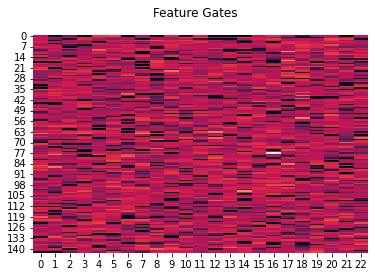

In [2]:
models, top_model = make_binary_models(
    input_dim_list, type="STG")
stg_history = train(models, top_model, train_loader, test_loader, 
                    save_dir='Checkpoints/pcmac-stg-model-client1.pt',
                    log_dir='Logs/pcamac-stg-model-client1.log',
                    mask_dir='Mask/pcmac/'
                    )

Epoch: 1, Train Loss: 13.7712, Train Acc: 0.4795, Test Acc: 0.4910, Best Acc: 0.491, Num Feats: 3289.0000, Num Emb: 384.0000
Epoch: 2, Train Loss: 13.3836, Train Acc: 0.4795, Test Acc: 0.4910, Best Acc: 0.491, Num Feats: 3289.0000, Num Emb: 384.0000
Epoch: 3, Train Loss: 13.3807, Train Acc: 0.4795, Test Acc: 0.4910, Best Acc: 0.491, Num Feats: 3289.0000, Num Emb: 384.0000
Epoch: 4, Train Loss: 13.3646, Train Acc: 0.4795, Test Acc: 0.4910, Best Acc: 0.491, Num Feats: 3289.0000, Num Emb: 384.0000
Epoch: 5, Train Loss: 13.3257, Train Acc: 0.4795, Test Acc: 0.4910, Best Acc: 0.491, Num Feats: 3289.0000, Num Emb: 384.0000
Epoch: 6, Train Loss: 13.2731, Train Acc: 0.4795, Test Acc: 0.4910, Best Acc: 0.491, Num Feats: 3289.0000, Num Emb: 384.0000
Epoch: 7, Train Loss: 12.7794, Train Acc: 0.4795, Test Acc: 0.4910, Best Acc: 0.491, Num Feats: 3289.0000, Num Emb: 384.0000
Epoch: 8, Train Loss: 11.5790, Train Acc: 0.4933, Test Acc: 0.7380, Best Acc: 0.7379628844114527, Num Feats: 3289.0000, Num E

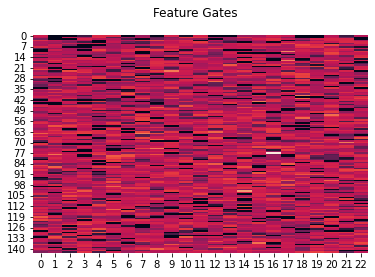

In [3]:
models, top_model = make_binary_models(
    input_dim_list, type="DualSTG")
dualstg_history = train(models, top_model, train_loader, test_loader, 
                    save_dir='Checkpoints/dualstg-model-client1.pt',
                    log_dir='Logs/dualstg-model-client1.log',
                    mask_dir='Mask/client1/'
                    )

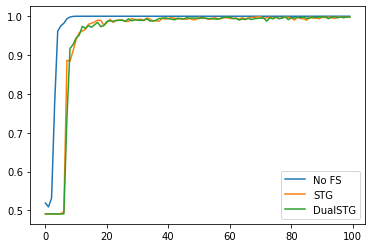

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(100), no_fs_history['test_acc'], label='No FS')
plt.plot(np.arange(100), stg_history['test_acc'], label='STG')
plt.plot(np.arange(100), dualstg_history['test_acc'], label='DualSTG')
plt.legend()
plt.show()

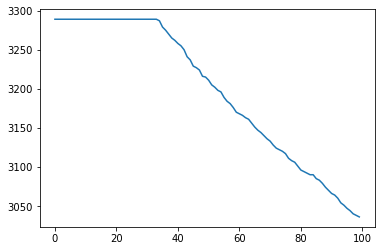

In [5]:
plt.plot(np.arange(100), dualstg_history['num_feats'], label='feats #')
plt.show()

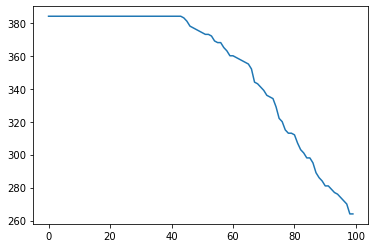

In [6]:
plt.plot(np.arange(100), dualstg_history['num_emb'], label='emb #')
plt.show()

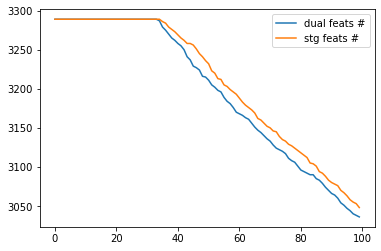

In [8]:
plt.plot(np.arange(100), dualstg_history['num_feats'], label='dual feats #')
plt.plot(np.arange(100), stg_history['num_feats'], label='stg feats #')
plt.legend()
plt.show()